In [1]:
#pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Random_forest import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from functions.Pre_processing_Casos_Graves import *
from functions.Random_forest import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn import svm

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

import optuna
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.model_selection import RepeatedKFold

Lendo o dataset

In [27]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

Utilizando a class random forest para fazer o pré processamento

In [28]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino']

In [29]:
random_forest = Random_forest(df)
random_forest.run_graves()

df = random_forest.df
df = df[list_features]
df

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.460870,0,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.747826,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.573913,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.591304,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.669565,0,1
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,0,1
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.643478,0,1
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.634783,1,0


In [34]:
# def XGBoost_objective (trial):

#     classifier_name = trial.suggest_categorical("classifier", ["XGBoost"])
    
#     max_depth = trial.suggest_float("max_depth", 3, 5, 7),
#     learning_rate = trial.suggest_float("learning_rate", 0.1, 0.2),
#     gamma = trial.suggest_float("gamma", 0.25, 1),
#     reg_lambda = trial.suggest_float("reg_lambda", 0, 1, 10),
#     scale_pos_weight = trial.suggest_float("scale_pos_weight", 1, 3, 5),
#     subsample = trial.suggest_float("subsample", 0.5, 0.8),
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 0.9)

#     # Init classifier
#     xgb_cl = xgb.XGBClassifier( #max_depth = max_depth , 
#                                 learning_rate =learning_rate,
#                                 reg_lambda = reg_lambda,
#                                 gamma = gamma,
#                                 scale_pos_weight = scale_pos_weight,
#                                 subsample = subsample,
#                                 colsample_bytree = colsample_bytree, 
#                                 objective="binary:logistic")

#     # prepare the cross-validation procedure
#     cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

#     score = cross_val_score(xgb_cl, X_train, y_train, n_jobs=-1, cv=cv ,scoring='f1')
#     f1 = score.mean() 
#     return f1


# X = df.drop("death",axis=1)
# y = df['death']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# if __name__ == "__main__":
#     study = optuna.create_study(direction="maximize")
#     study.optimize(XGBoost_objective, n_trials = 50)
#     print(study.best_trial)

Criando um função para executar o modelo com k-fold e com repetição

In [30]:
def XGBoost_model (X_train, y_train):
    param_grid = {
        "max_depth": [3, 5, 7],
        #"learning_rate": [0.1, 0.2],
        "gamma": [0.25, 1],
        #"reg_lambda": [0, 1, 10],
        "scale_pos_weight": [1, 3, 5],
        #"subsample": [0.8],
        "colsample_bytree": [0.5, 0.9] }

    # Init classifier
    xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs = -1, cv=cv, scoring = "roc_auc")

    # Fit 
    _ = grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

Aplicando o modelo para diferentes random_states 

In [6]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

X = df.drop("death",axis=1)
y = df['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores.append(mean_test_score)
    std_test_scores.append(std_test_score)
    best_scores.append(best_score)
    best_params.append(best_param)


########################################
mean_test_score: 0.7852734808378256
std_test_score: 0.005510443387221129

best_score: 0.7915525906514981
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7853296742147065
std_test_score: 0.005969123831411914

best_score: 0.7918686269955117
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7819024393295606
std_test_score: 0.005042600912993622

best_score: 0.7885479292308415
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7828882634612869
std_test_score: 0.006310232786671417

best_score: 0.7893661258708877
best_params_: {'c

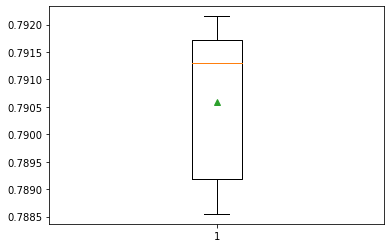

In [7]:
from matplotlib import pyplot

pyplot.boxplot(best_scores, showmeans=True)
pyplot.show()

Testando para os melhores parametros

In [8]:
print(f'Best_score = {max(best_scores)}')
index = best_scores.index(max(best_scores))
print(f'Best_params = {best_params[index]}')

Best_score = 0.7921518991378352
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


In [9]:
# parametrizando o modelo final
final_cl = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl.fit(X_train, y_train)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

0.7506518457527103

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
#plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
#plt.show()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      5351
           1       0.56      0.29      0.39      1936

    accuracy                           0.75      7287
   macro avg       0.67      0.60      0.61      7287
weighted avg       0.72      0.75      0.72      7287



## Aplicando para os períodos de 6 meses:

In [31]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [32]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-08-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_3 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_4 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2022-06-13')]

#### Criando listas para armazenamento dos melhores parâmetros:

In [33]:
mean_test_scores_periodos_6meses = []
std_test_scores_periodos_6meses = []
best_scores_periodos_6meses = []
best_params_periodos_6meses = []

#### Período 1 (26/02/2020 até 31/08/2020):

In [34]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.486239,0,1
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.788991,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.605505,0,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.623853,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.211009,1,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.614679,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.623853,0,1
36276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.752294,1,0


In [35]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df_p1.drop("death",axis=1)
y = df_p1['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_1)
std_test_scores_periodos_6meses.append(std_test_scores_1)
best_scores_periodos_6meses.append(best_scores_1)
best_params_periodos_6meses.append(best_params_1)


########################################
mean_test_score: 0.8368973340886451
std_test_score: 0.0069107203279567325

best_score: 0.8443225930486453
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8399113646454058
std_test_score: 0.008055419983452963

best_score: 0.846637426181246
best_params_: {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8363045207140822
std_test_score: 0.01046078024035885

best_score: 0.8436683436541113
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.8380650393483938
std_test_score: 0.008262584405352717

best_score: 0.8453852981919466
best_params_: {

In [36]:
print(f'Best_score = {max(best_scores_periodos_6meses[0])}')
index = best_scores_periodos_6meses[0].index(max(best_scores_periodos_6meses[0]))
print(f'Best_params = {best_params_periodos_6meses[0][index]}')

Best_score = 0.846637426181246
Best_params = {'colsample_bytree': 0.5, 'gamma': 0.25, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [37]:
# parametrizando o modelo final
final_cl_p1 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 0.25, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p1.fit(X_train, y_train)


preds = final_cl_p1.predict(X_test)

accuracy_score(y_test, preds)

0.8317557251908397

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2627
           1       0.61      0.41      0.49       648

    accuracy                           0.83      3275
   macro avg       0.74      0.67      0.69      3275
weighted avg       0.82      0.83      0.82      3275



#### Período 2 (01/09/2020 até 28/02/2021):

In [39]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.736842,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.166667,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.798246,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.736842,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.666667,1,0
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.570175,1,0
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.429825,0,1
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.798246,1,0


In [40]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df_p2.drop("death",axis=1)
y = df_p2['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_2)
std_test_scores_periodos_6meses.append(std_test_scores_2)
best_scores_periodos_6meses.append(best_scores_2)
best_params_periodos_6meses.append(best_params_2)


########################################
mean_test_score: 0.7436258517242327
std_test_score: 0.014289161290654741

best_score: 0.7640847310602331
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7561741175914195
std_test_score: 0.01614383763763498

best_score: 0.7740326272831004
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7519074672800126
std_test_score: 0.013786263560342947

best_score: 0.7719694221238583
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.755951165079604
std_test_score: 0.015402559510481825

best_score: 0.7740252564459837
best_params_: {'col

In [42]:
print(f'Best_score = {max(best_scores_periodos_6meses[1])}')
index = best_scores_periodos_6meses[1].index(max(best_scores_periodos_6meses[1]))
print(f'Best_params = {best_params_periodos_6meses[1][index]}')

Best_score = 0.7765343868750955
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [44]:
# parametrizando o modelo final
final_cl_p2 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p2.fit(X_train, y_train)


preds = final_cl_p2.predict(X_test)

accuracy_score(y_test, preds)

0.7330049261083744

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       694
           1       0.61      0.44      0.51       321

    accuracy                           0.73      1015
   macro avg       0.69      0.65      0.66      1015
weighted avg       0.72      0.73      0.72      1015



#### Período 3 (01/03/2021 até 31/08/2021):

In [46]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429825,0,1
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.315789,1,0
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.368421,1,0
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.394737,0,1
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.377193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,1,0
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.508772,1,0
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.403509,0,1
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,0,1


In [47]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df_p3.drop("death",axis=1)
y = df_p3['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_3)
std_test_scores_periodos_6meses.append(std_test_scores_3)
best_scores_periodos_6meses.append(best_scores_3)
best_params_periodos_6meses.append(best_params_3)


########################################
mean_test_score: 0.7662050327064468
std_test_score: 0.011684944248144858

best_score: 0.7827244989797464
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7605742820920062
std_test_score: 0.012802066025570932

best_score: 0.7778521196894467
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7652712874213775
std_test_score: 0.013335790839555385

best_score: 0.7826023734198797
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7594117931765102
std_test_score: 0.010730895169295391

best_score: 0.7766152178044884
best_params_: {'c

In [48]:
print(f'Best_score = {max(best_scores_periodos_6meses[2])}')
index = best_scores_periodos_6meses[2].index(max(best_scores_periodos_6meses[2]))
print(f'Best_params = {best_params_periodos_6meses[2][index]}')

Best_score = 0.7844289669244334
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [49]:
# parametrizando o modelo final
final_cl_p3 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p3.fit(X_train, y_train)


preds = final_cl_p3.predict(X_test)

accuracy_score(y_test, preds)

0.7412507171543317

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1191
           1       0.64      0.41      0.50       552

    accuracy                           0.74      1743
   macro avg       0.70      0.65      0.66      1743
weighted avg       0.73      0.74      0.72      1743



#### Período 4 (01/09/2021 até 28/02/2022):

In [51]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p4 = random_forest.df
df_p4 = df_p4[list_features]
df_p4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429825,0,1
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.315789,1,0
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.368421,1,0
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.394737,0,1
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.377193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,1,0
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.508772,1,0
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.403509,0,1
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,0,1


In [52]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df_p4.drop("death",axis=1)
y = df_p4['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_4)
std_test_scores_periodos_6meses.append(std_test_scores_4)
best_scores_periodos_6meses.append(best_scores_4)
best_params_periodos_6meses.append(best_params_4)

########################################
mean_test_score: 0.7662050327064468
std_test_score: 0.011684944248144858

best_score: 0.7827244989797464
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7605742820920062
std_test_score: 0.012802066025570932

best_score: 0.7778521196894467
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7652712874213775
std_test_score: 0.013335790839555385

best_score: 0.7826023734198797
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7594117931765102
std_test_score: 0.010730895169295391

best_score: 0.7766152178044884
best_params_: {'c

In [53]:
print(f'Best_score = {max(best_scores_periodos_6meses[3])}')
index = best_scores_periodos_6meses[3].index(max(best_scores_periodos_6meses[3]))
print(f'Best_params = {best_params_periodos_6meses[3][index]}')

Best_score = 0.7844289669244334
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [54]:
# parametrizando o modelo final
final_cl_p4 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p4.fit(X_train, y_train)


preds = final_cl_p4.predict(X_test)

accuracy_score(y_test, preds)

0.7412507171543317

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p4, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1191
           1       0.64      0.41      0.50       552

    accuracy                           0.74      1743
   macro avg       0.70      0.65      0.66      1743
weighted avg       0.73      0.74      0.72      1743



#### Período 5 (01/03/2022 até 13/06/2022):

In [56]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p5 = random_forest.df
df_p5 = df_p5[list_features]
df_p5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.429825,0,1
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.315789,1,0
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.368421,1,0
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.394737,0,1
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.377193,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,1,0
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.508772,1,0
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.403509,0,1
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.622807,0,1


In [57]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df_p5.drop("death",axis=1)
y = df_p5['death']

for random_state in list_random_states:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_5)
std_test_scores_periodos_6meses.append(std_test_scores_5)
best_scores_periodos_6meses.append(best_scores_5)
best_params_periodos_6meses.append(best_params_5)

########################################
mean_test_score: 0.7662050327064468
std_test_score: 0.011684944248144858

best_score: 0.7827244989797464
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7605742820920062
std_test_score: 0.012802066025570932

best_score: 0.7778521196894467
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7652712874213775
std_test_score: 0.013335790839555385

best_score: 0.7826023734198797
best_params_: {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}
########################################

########################################
mean_test_score: 0.7594117931765102
std_test_score: 0.010730895169295391

best_score: 0.7766152178044884
best_params_: {'c

In [58]:
print(f'Best_score = {max(best_scores_periodos_6meses[4])}')
index = best_scores_periodos_6meses[4].index(max(best_scores_periodos_6meses[4]))
print(f'Best_params = {best_params_periodos_6meses[4][index]}')

Best_score = 0.7844289669244334
Best_params = {'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 3, 'scale_pos_weight': 1}


## Testando o modelo para os melhores parâmetros:

In [59]:
# parametrizando o modelo final
final_cl_p5 = xgb.XGBClassifier(colsample_bytree = 0.5, gamma = 1, max_depth = 3, scale_pos_weight = 1)

#treinando o modelo final
final_cl_p5.fit(X_train, y_train)


preds = final_cl_p5.predict(X_test)

accuracy_score(y_test, preds)

0.7412507171543317

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


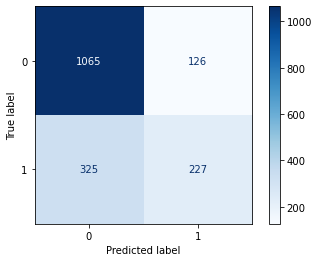

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1191
           1       0.64      0.41      0.50       552

    accuracy                           0.74      1743
   macro avg       0.70      0.65      0.66      1743
weighted avg       0.73      0.74      0.72      1743



In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

### Análise geral para os períodos de 6 meses:

In [65]:
from statistics import mean

print(f'Maior score: {max(best_scores_periodos_6meses)} \nMenor Score: {min(best_params_periodos_6meses)} \nMedia Scores: {mean(best_params_periodos_6meses)} ')
print(f'Desvio padrão médio: {mean(std_test_scores_periodos_6meses)} ')

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [ ]:
pyplot.boxplot(best_scores_periodos_6meses, showmeans=True)
pyplot.show()

## APLICANDO PARA PERIODO DE 3 MESES

In [ ]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [42]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-05-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-06-01') & (df['data_notificacao'] < '2020-08-31')]
periodo_3 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2020-11-30')]
periodo_4 = df[(df['data_notificacao'] > '2020-12-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-05-31')]
periodo_6 = df[(df['data_notificacao'] > '2021-06-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_7 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2021-11-30')]
periodo_8 = df[(df['data_notificacao'] > '2021-12-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_9 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2025-05-31')]
periodo_10 = df[(df['data_notificacao'] > '2022-06-01') & (df['data_notificacao'] < '2022-06-13')]

In [ ]:
mean_test_scores_periodos_3mese = []
std_test_scores_periodos_3meses = []
best_scores_periodos_3meses = []
best_params_periodos_3meses = []

#### Aplicando para perido 1 - 3 meses

In [43]:
random_forest = Random_forest(periodo_1)
random_forest.run_graves()

df_p1 = random_forest.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.486239,0,1
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.633028,0,1
25,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.642202,0,1
26,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.596330,0,1
27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.467890,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.532110,1,0
36272,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.871560,1,0
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.614679,0,1
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.623853,0,1


In [ ]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p1.drop("death",axis=1)
    y = df_p1['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


In [ ]:
print(f'Best_score = {max(best_scores_periodos_3meses[0])}')
index = best_scores.index(max(best_scores_periodos_3meses[0]))
print(f'Best_params = {best_params_periodos_3meses[0][index]}')

#### Aplicando periodo 2 - 3 meses

In [49]:
random_forest = Random_forest(periodo_2)
random_forest.run_graves()

df_p2 = random_forest.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.803738,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.635514,0,1
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.869159,0,1
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.626168,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.644860,1,0
36252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.654206,1,0
36261,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.747664,0,1
36270,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.766355,1,0


In [ ]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p2.drop("death",axis=1)
    y = df_p2['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


In [ ]:
print(f'Best_score = {max(best_scores_periodos_3meses[1])}')
index = best_scores.index(max(best_scores_periodos_3meses[1]))
print(f'Best_params = {best_params_periodos_3meses[1][index]}')

#### Aplicando periodo 3 - 3 meses

In [54]:
random_forest = Random_forest(periodo_3)
random_forest.run_graves()

df_p3 = random_forest.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.807692,0,1
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182692,0,1
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.875000,1,0
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.548077,0,1
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.807692,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.576923,1,0
36169,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.586538,0,1
36235,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0.605769,0,1
36236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.519231,0,1


In [ ]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [0,12,42,50,54,68,79,81,92,112]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

for random_state in list_random_states:
    X = df_p3.drop("death",axis=1)
    y = df_p3['death']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)

    mean_test_score, std_test_score, best_score, best_param = XGBoost_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_3mese.append(mean_test_scores)
std_test_scores_periodos_3meses.append(std_test_scores)
best_scores_periodos_3meses.append(best_scores)
best_params_periodos_3meses.append(best_params)


In [ ]:
print(f'Best_score = {max(best_scores_periodos_3meses[2])}')
index = best_scores.index(max(best_scores_periodos_3meses[2]))
print(f'Best_params = {best_params_periodos_3meses[2][index]}')